Introduction:

Deep learning and computer vision have become popular fields in recent years, thanks to the advancements in convolutional neural networks (CNNs). Filters play a crucial role in these networks, allowing them to learn complex patterns and features from images. In this demonstration, we'll use Jupyter Notebook to explore different types of filters and their applications in deep learning and computer vision.

Filter List and Explanations:

Sobel Filter: Sobel filters are used for edge detection and are applied in both horizontal and vertical directions to calculate the gradient of the image. The gradient helps identify the edges in the image.

Gaussian Filter: Gaussian filters are used for image smoothing and noise reduction. They work by convolving the image with a Gaussian kernel, which has the shape of a bell curve.

Laplacian Filter: Laplacian filters are used to detect edges and sharpen images. They calculate the second derivative of the image, which highlights areas of rapid intensity change.

Median Filter: Median filters are used for noise reduction, specifically impulse noise (also known as salt-and-pepper noise). They replace each pixel with the median value of its neighboring pixels.

Max Pooling: Max pooling is a downsampling technique commonly used in convolutional neural networks. It reduces the spatial dimensions of the input by selecting the maximum value from a given window.

Code Demonstration:

First, let's install the necessary libraries and load an example image:

In [1]:
!pip install numpy opencv-python matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 17.0 MB/s eta 0:00:0000:0100:01


In [13]:
!sudo -S apt-get update
!sudo -S apt-get install -y libgl1-mesa-glx



Get:1 http://archive.ubuntu.com/ubuntu focal InRelease [265 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]        
Get:3 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]      
Get:4 https://dl.yarnpkg.com/debian stable InRelease [17.1 kB]                 
Get:5 https://packages.microsoft.com/repos/microsoft-ubuntu-focal-prod focal InRelease [3611 B]
Get:6 https://repo.anaconda.com/pkgs/misc/debrepo/conda stable InRelease [3960 B]
Get:7 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]      
Get:8 http://archive.ubuntu.com/ubuntu focal/restricted amd64 Packages [33.4 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal/main amd64 Packages [1275 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [177 kB]
Get:11 http://archive.ubuntu.com/ubuntu focal/universe amd64 Packages [11.3 MB]
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1325 kB]
Get:14 http://archive.ubuntu.com/

In the backend, a CNN layer (Convolutional layer) performs the convolution operation between the input image or feature maps and a set of filters (kernels). Each filter in the convolutional layer learns different features from the input. The output of this operation is a set of feature maps, which are then passed to the next layer in the network. This process is repeated for multiple layers, allowing the network to learn complex patterns and features from the input data.

Here's a simple implementation of a single convolutional layer using Python and NumPy, without using any deep learning frameworks like Keras or TensorFlow:

In [5]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

def conv2d(input_data, filters, stride=1, padding=0):
    # Get dimensions
    batch_size, input_height, input_width, input_channels = input_data.shape
    num_filters, filter_height, filter_width, filter_channels = filters.shape

    # Calculate output dimensions
    output_height = (input_height - filter_height + 2 * padding) // stride + 1
    output_width = (input_width - filter_width + 2 * padding) // stride + 1

    # Initialize output feature maps
    output = np.zeros((batch_size, output_height, output_width, num_filters))

    # Apply padding if specified
    if padding > 0:
        input_data_padded = np.pad(input_data, ((0, 0), (padding, padding), (padding, padding), (0, 0)), mode='constant')
    else:
        input_data_padded = input_data

    # Perform convolution
    for b in range(batch_size):
        for y in range(output_height):
            for x in range(output_width):
                for f in range(num_filters):
                    # Calculate the receptive field coordinates
                    y_start = y * stride
                    y_end = y_start + filter_height
                    x_start = x * stride
                    x_end = x_start + filter_width
                    
                    # Perform element-wise multiplication and sum the result
                    output[b, y, x, f] = np.sum(input_data_padded[b, y_start:y_end, x_start:x_end, :] * filters[f, :, :, :])

    return output


In [6]:
# Create a random input tensor (1 image with dimensions 28x28 and 3 channels)
input_data = np.random.rand(1, 28, 28, 3)

# Create 8 random filters (each with dimensions 3x3 and 3 channels)
filters = np.random.rand(8, 3, 3, 3)

# Perform the convolution operation
output = conv2d(input_data, filters)

print("Output shape:", output.shape)


Output shape: (1, 26, 26, 8)


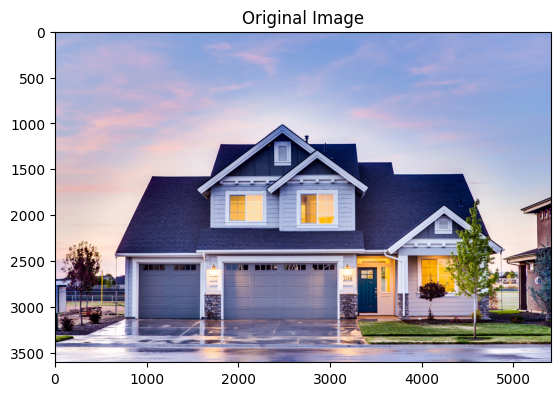

In [7]:
# Load the image in color mode
image = cv2.imread('Images/house.jpeg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Normalize the image to range [0, 1]
image_normalized = image.astype(np.float32) / 255.0

plt.imshow(image_normalized)
plt.title('Original Image')
plt.show()

In [9]:
# Create an input tensor (1 image with dimensions height x width x 3 channels)
input_data = image_normalized[np.newaxis, :, :, :]

# Create 6 random filters (each with dimensions 3x3 and 3 channels)
filters = np.random.rand(6, 3, 3, 3)

# Perform the convolution operation
output = conv2d(input_data, filters)

print("Output shape:", output.shape)


Output shape: (1, 3603, 5406, 6)


In [ ]:
output_normalized = (output - output.min()) / (output.max() - output.min())

fig, axes = plt.subplots(1, 6, figsize=(20, 5))
for i in range(6):
    axes[i].imshow(output_normalized[0, :, :, i])
    axes[i].set_title(f'Feature Map {i+1}')
    axes[i].axis('off')

plt.show()


: 

: 

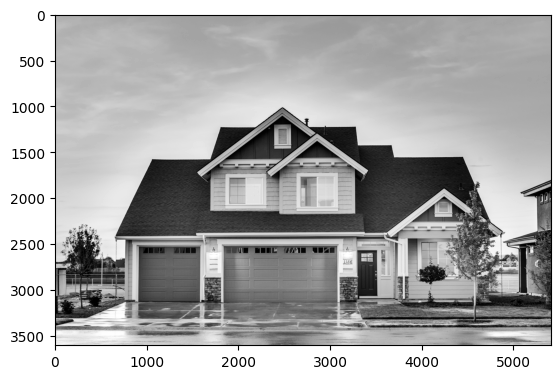

In [8]:


image = cv2.imread('Images/house.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

Sobel Filter:

Text(0.5, 1.0, 'Sobel Y')

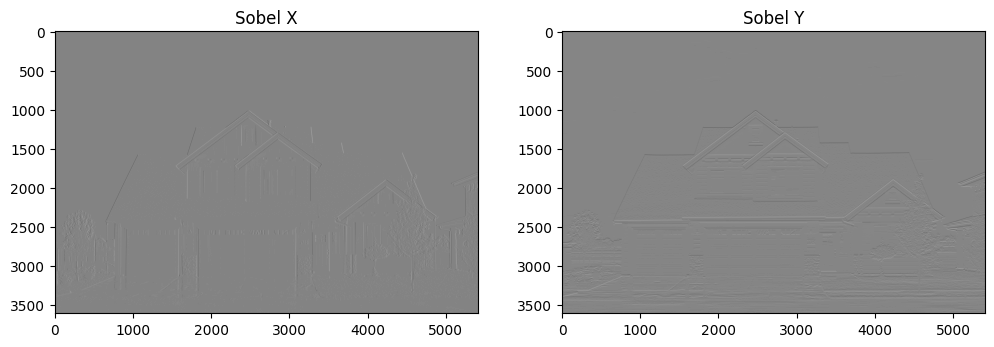

In [16]:
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')

plt.subplot(1, 2, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')


Gaussian Filter:

Text(0.5, 1.0, 'Gaussian Filtered')

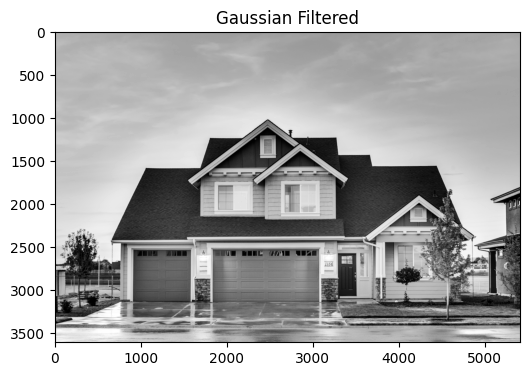

In [17]:
gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 0)

plt.figure(figsize=(6, 6))
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filtered')


Laplacian Filter:

Text(0.5, 1.0, 'Laplacian Filtered')

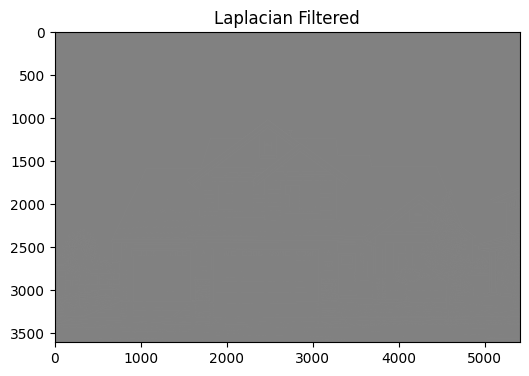

In [19]:
laplacian = cv2.Laplacian(image, cv2.CV_64F)

plt.figure(figsize=(6, 6))
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Filtered')


Median Filter:

Text(0.5, 1.0, 'Median Filtered')

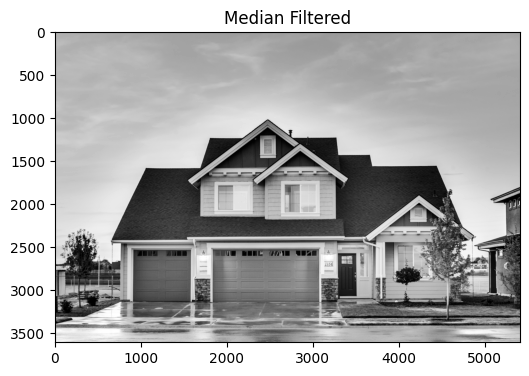

In [20]:
median_filtered = cv2.medianBlur(image, 5)

plt.figure(figsize=(6, 6))
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filtered')


Max Pooling:

Text(0.5, 1.0, 'Max Pooled')

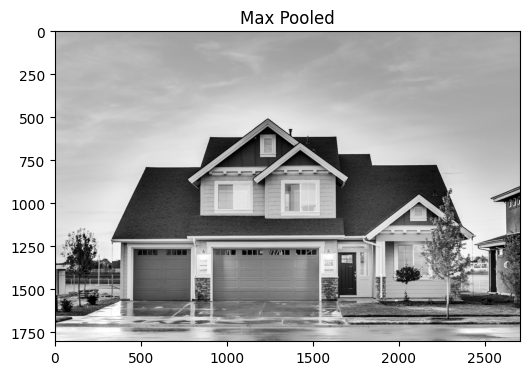

In [23]:
def max_pooling(image, ksize=2, stride=2):
    h, w = image.shape
    output_h = (h - ksize) // stride + 1
    output_w = (w - ksize) // stride + 1
    output = np.zeros((output_h, output_w), dtype=np.float32)

    for y in range(0, h - ksize + 1, stride):
        for x in range(0, w - ksize + 1, stride):
            output[y // stride, x // stride] = np.max(image[y:y + ksize, x:x + ksize])

    return output

max_pooled = max_pooling(image)

plt.figure(figsize=(6, 6))
plt.imshow(max_pooled, cmap='gray')
plt.title('Max Pooled')
